In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/pima-indians-diabetes.csv',header=None)
print(f'{data.shape}\n{data.head()}')

(768, 9)
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


In [3]:
x = data.iloc[:,:8]
x

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y = data.iloc[:,8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

In [6]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}')

x_train: (614, 8)
y_train: (614,)
x_test: (154, 8)
y_test: (154,)


# StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [8]:
scaler.fit(x_test)
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.49124165, -0.72667791, -0.44147615, ...,  0.23374785,
        -0.17094071,  0.66661154],
       [-0.63368347, -0.28534901,  0.31890843, ...,  0.43537945,
        -1.08608042, -1.07335756],
       [-0.63368347, -0.41144298, -0.17310512, ..., -0.14579397,
        -1.05362866, -1.07335756],
       ...,
       [ 1.05370422, -0.82124838,  0.18472291, ...,  0.56584695,
         0.00754398,  1.77386461],
       [-0.63368347,  0.78644972,  0.09526591, ..., -0.47789306,
        -0.47274211, -0.44064153],
       [ 1.05370422, -1.48324172,  0.09526591, ...,  0.38793672,
         0.72148276,  0.35025352]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Dense(12,
                input_dim=8,
                activation = 'relu'))

In [11]:
model.add(Dense(8, 
                activation = 'relu'))

In [12]:
model.add(Dense(1, 
                activation = 'sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
history = model.fit(x_train,
                    y_train,
                    epochs = 1000,
                    validation_data = (x_test, y_test))




Train on 614 samples, validate on 154 samples
Epoch 1/1000





614/614 [==============================] - 1s 900us/step - loss: 0.8852 - acc: 0.3469 - val_loss: 0.8545 - val_acc: 0.3312
Epoch 2/1000
614/614 [==============================] - 0s 56us/step - loss: 0.7885 - acc: 0.3713 - val_loss: 0.7700 - val_acc: 0.3831
Epoch 3/1000
614/614 [==============================] - 0s 53us/step - loss: 0.7216 - acc: 0.4870 - val_loss: 0.7207 - val_acc: 0.5130
Epoch 4/1000
614/614 [==============================] - 0s 62us/step - loss: 0.6796 - acc: 0.6384 - val_loss: 0.6828 - val_acc: 0.6104
Epoch 5/1000
614/614 [==============================] - 0s 49us/step - loss: 0.6437 - acc: 0.6889 - val_loss: 0.6505 - val_acc: 0.6558
Epoch 6/1000
614/614 [==============================] - 0s 54us/step - loss: 0.6139 - acc: 0.7052 - val_loss: 0.6218 - val_acc: 0.6688
Epoch 7/1000
614/614 [==============================] - 0s 47us/step - loss: 0.5864 - acc: 0.7329 - val_loss: 0.5984 - val_acc: 0.7013


Epoch 49/1000
614/614 [==============================] - 0s 36us/step - loss: 0.4139 - acc: 0.7997 - val_loss: 0.5279 - val_acc: 0.7597
Epoch 50/1000
614/614 [==============================] - 0s 41us/step - loss: 0.4132 - acc: 0.8013 - val_loss: 0.5284 - val_acc: 0.7468
Epoch 51/1000
614/614 [==============================] - 0s 39us/step - loss: 0.4126 - acc: 0.8029 - val_loss: 0.5297 - val_acc: 0.7468
Epoch 52/1000
614/614 [==============================] - 0s 37us/step - loss: 0.4118 - acc: 0.8062 - val_loss: 0.5285 - val_acc: 0.7662
Epoch 53/1000
614/614 [==============================] - 0s 38us/step - loss: 0.4105 - acc: 0.8062 - val_loss: 0.5295 - val_acc: 0.7662
Epoch 54/1000
614/614 [==============================] - 0s 45us/step - loss: 0.4102 - acc: 0.8029 - val_loss: 0.5319 - val_acc: 0.7468
Epoch 55/1000
614/614 [==============================] - 0s 47us/step - loss: 0.4091 - acc: 0.8062 - val_loss: 0.5302 - val_acc: 0.7727
Epoch 56/1000
614/614 [=========================

614/614 [==============================] - 0s 38us/step - loss: 0.3764 - acc: 0.8176 - val_loss: 0.5860 - val_acc: 0.7532
Epoch 110/1000
614/614 [==============================] - 0s 38us/step - loss: 0.3764 - acc: 0.8225 - val_loss: 0.5875 - val_acc: 0.7468
Epoch 111/1000
614/614 [==============================] - 0s 36us/step - loss: 0.3752 - acc: 0.8257 - val_loss: 0.5899 - val_acc: 0.7468
Epoch 112/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3754 - acc: 0.8208 - val_loss: 0.5931 - val_acc: 0.7403
Epoch 113/1000
614/614 [==============================] - 0s 49us/step - loss: 0.3747 - acc: 0.8225 - val_loss: 0.5938 - val_acc: 0.7403
Epoch 114/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3742 - acc: 0.8241 - val_loss: 0.5950 - val_acc: 0.7403
Epoch 115/1000
614/614 [==============================] - 0s 39us/step - loss: 0.3743 - acc: 0.8241 - val_loss: 0.5936 - val_acc: 0.7532
Epoch 116/1000
614/614 [==============================] 

Epoch 169/1000
614/614 [==============================] - 0s 39us/step - loss: 0.3568 - acc: 0.8241 - val_loss: 0.6379 - val_acc: 0.7208
Epoch 170/1000
614/614 [==============================] - 0s 60us/step - loss: 0.3562 - acc: 0.8241 - val_loss: 0.6371 - val_acc: 0.7273
Epoch 171/1000
614/614 [==============================] - 0s 45us/step - loss: 0.3555 - acc: 0.8322 - val_loss: 0.6399 - val_acc: 0.7208
Epoch 172/1000
614/614 [==============================] - 0s 36us/step - loss: 0.3571 - acc: 0.8290 - val_loss: 0.6444 - val_acc: 0.7208
Epoch 173/1000
614/614 [==============================] - 0s 41us/step - loss: 0.3555 - acc: 0.8306 - val_loss: 0.6405 - val_acc: 0.7273
Epoch 174/1000
614/614 [==============================] - 0s 47us/step - loss: 0.3548 - acc: 0.8306 - val_loss: 0.6383 - val_acc: 0.7338
Epoch 175/1000
614/614 [==============================] - 0s 45us/step - loss: 0.3549 - acc: 0.8290 - val_loss: 0.6364 - val_acc: 0.7338
Epoch 176/1000
614/614 [=================

Epoch 229/1000
614/614 [==============================] - 0s 55us/step - loss: 0.3396 - acc: 0.8436 - val_loss: 0.6777 - val_acc: 0.7078
Epoch 230/1000
614/614 [==============================] - 0s 37us/step - loss: 0.3393 - acc: 0.8420 - val_loss: 0.6800 - val_acc: 0.7078
Epoch 231/1000
614/614 [==============================] - 0s 32us/step - loss: 0.3408 - acc: 0.8420 - val_loss: 0.6782 - val_acc: 0.7078
Epoch 232/1000
614/614 [==============================] - 0s 36us/step - loss: 0.3397 - acc: 0.8388 - val_loss: 0.6778 - val_acc: 0.7273
Epoch 233/1000
614/614 [==============================] - 0s 34us/step - loss: 0.3384 - acc: 0.8371 - val_loss: 0.6788 - val_acc: 0.7338
Epoch 234/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3375 - acc: 0.8436 - val_loss: 0.6803 - val_acc: 0.7208
Epoch 235/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3377 - acc: 0.8453 - val_loss: 0.6769 - val_acc: 0.7208
Epoch 236/1000
614/614 [=================

Epoch 289/1000
614/614 [==============================] - 0s 50us/step - loss: 0.3260 - acc: 0.8420 - val_loss: 0.7179 - val_acc: 0.7143
Epoch 290/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3257 - acc: 0.8420 - val_loss: 0.7225 - val_acc: 0.7013
Epoch 291/1000
614/614 [==============================] - 0s 41us/step - loss: 0.3252 - acc: 0.8371 - val_loss: 0.7269 - val_acc: 0.7013
Epoch 292/1000
614/614 [==============================] - 0s 39us/step - loss: 0.3247 - acc: 0.8371 - val_loss: 0.7249 - val_acc: 0.7208
Epoch 293/1000
614/614 [==============================] - ETA: 0s - loss: 0.2656 - acc: 0.875 - 0s 42us/step - loss: 0.3249 - acc: 0.8355 - val_loss: 0.7255 - val_acc: 0.7143
Epoch 294/1000
614/614 [==============================] - 0s 43us/step - loss: 0.3237 - acc: 0.8388 - val_loss: 0.7250 - val_acc: 0.7143
Epoch 295/1000
614/614 [==============================] - 0s 49us/step - loss: 0.3242 - acc: 0.8371 - val_loss: 0.7275 - val_acc: 0.7143
Epo

614/614 [==============================] - 0s 50us/step - loss: 0.3165 - acc: 0.8453 - val_loss: 0.7525 - val_acc: 0.7143
Epoch 349/1000
614/614 [==============================] - 0s 44us/step - loss: 0.3161 - acc: 0.8485 - val_loss: 0.7507 - val_acc: 0.7273
Epoch 350/1000
614/614 [==============================] - 0s 44us/step - loss: 0.3155 - acc: 0.8502 - val_loss: 0.7542 - val_acc: 0.7208
Epoch 351/1000
614/614 [==============================] - 0s 39us/step - loss: 0.3166 - acc: 0.8485 - val_loss: 0.7535 - val_acc: 0.7208
Epoch 352/1000
614/614 [==============================] - 0s 39us/step - loss: 0.3159 - acc: 0.8485 - val_loss: 0.7490 - val_acc: 0.7208
Epoch 353/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3165 - acc: 0.8469 - val_loss: 0.7547 - val_acc: 0.7208
Epoch 354/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3157 - acc: 0.8436 - val_loss: 0.7523 - val_acc: 0.7208
Epoch 355/1000
614/614 [==============================] 

Epoch 408/1000
614/614 [==============================] - 0s 52us/step - loss: 0.3066 - acc: 0.8534 - val_loss: 0.7632 - val_acc: 0.7078
Epoch 409/1000
614/614 [==============================] - 0s 49us/step - loss: 0.3062 - acc: 0.8567 - val_loss: 0.7663 - val_acc: 0.7143
Epoch 410/1000
614/614 [==============================] - 0s 42us/step - loss: 0.3060 - acc: 0.8567 - val_loss: 0.7660 - val_acc: 0.7143
Epoch 411/1000
614/614 [==============================] - 0s 41us/step - loss: 0.3060 - acc: 0.8583 - val_loss: 0.7683 - val_acc: 0.7143
Epoch 412/1000
614/614 [==============================] - 0s 44us/step - loss: 0.3061 - acc: 0.8534 - val_loss: 0.7707 - val_acc: 0.7143
Epoch 413/1000
614/614 [==============================] - 0s 44us/step - loss: 0.3061 - acc: 0.8567 - val_loss: 0.7705 - val_acc: 0.7143
Epoch 414/1000
614/614 [==============================] - 0s 41us/step - loss: 0.3074 - acc: 0.8453 - val_loss: 0.7656 - val_acc: 0.7208
Epoch 415/1000
614/614 [=================

Epoch 468/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2974 - acc: 0.8534 - val_loss: 0.7769 - val_acc: 0.7143
Epoch 469/1000
614/614 [==============================] - 0s 54us/step - loss: 0.2965 - acc: 0.8550 - val_loss: 0.7801 - val_acc: 0.7143
Epoch 470/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2961 - acc: 0.8534 - val_loss: 0.7796 - val_acc: 0.7078
Epoch 471/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2965 - acc: 0.8518 - val_loss: 0.7797 - val_acc: 0.7078
Epoch 472/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2960 - acc: 0.8567 - val_loss: 0.7764 - val_acc: 0.7143
Epoch 473/1000
614/614 [==============================] - 0s 37us/step - loss: 0.2961 - acc: 0.8534 - val_loss: 0.7779 - val_acc: 0.7143
Epoch 474/1000
614/614 [==============================] - 0s 43us/step - loss: 0.2950 - acc: 0.8567 - val_loss: 0.7815 - val_acc: 0.7143
Epoch 475/1000
614/614 [=================

Epoch 528/1000
614/614 [==============================] - 0s 50us/step - loss: 0.2853 - acc: 0.8648 - val_loss: 0.8003 - val_acc: 0.7143
Epoch 529/1000
614/614 [==============================] - 0s 42us/step - loss: 0.2846 - acc: 0.8648 - val_loss: 0.7966 - val_acc: 0.7078
Epoch 530/1000
614/614 [==============================] - 0s 48us/step - loss: 0.2849 - acc: 0.8664 - val_loss: 0.8012 - val_acc: 0.6948
Epoch 531/1000
614/614 [==============================] - 0s 40us/step - loss: 0.2855 - acc: 0.8632 - val_loss: 0.8020 - val_acc: 0.7078
Epoch 532/1000
614/614 [==============================] - 0s 47us/step - loss: 0.2855 - acc: 0.8616 - val_loss: 0.8059 - val_acc: 0.7013
Epoch 533/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2865 - acc: 0.8730 - val_loss: 0.8037 - val_acc: 0.6948
Epoch 534/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2844 - acc: 0.8697 - val_loss: 0.8051 - val_acc: 0.7013
Epoch 535/1000
614/614 [=================

Epoch 588/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2732 - acc: 0.8827 - val_loss: 0.8395 - val_acc: 0.7143
Epoch 589/1000
614/614 [==============================] - 0s 42us/step - loss: 0.2736 - acc: 0.8779 - val_loss: 0.8499 - val_acc: 0.7143
Epoch 590/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2739 - acc: 0.8762 - val_loss: 0.8372 - val_acc: 0.7208
Epoch 591/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2732 - acc: 0.8730 - val_loss: 0.8448 - val_acc: 0.7143
Epoch 592/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2727 - acc: 0.8795 - val_loss: 0.8381 - val_acc: 0.7143
Epoch 593/1000
614/614 [==============================] - 0s 49us/step - loss: 0.2717 - acc: 0.8811 - val_loss: 0.8440 - val_acc: 0.7143
Epoch 594/1000
614/614 [==============================] - 0s 60us/step - loss: 0.2723 - acc: 0.8795 - val_loss: 0.8429 - val_acc: 0.7143
Epoch 595/1000
614/614 [=================

Epoch 648/1000
614/614 [==============================] - 0s 43us/step - loss: 0.2627 - acc: 0.8860 - val_loss: 0.8758 - val_acc: 0.7078
Epoch 649/1000
614/614 [==============================] - 0s 42us/step - loss: 0.2623 - acc: 0.8876 - val_loss: 0.8785 - val_acc: 0.7078
Epoch 650/1000
614/614 [==============================] - 0s 49us/step - loss: 0.2627 - acc: 0.8860 - val_loss: 0.8791 - val_acc: 0.7013
Epoch 651/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2615 - acc: 0.8827 - val_loss: 0.8789 - val_acc: 0.7078
Epoch 652/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2617 - acc: 0.8860 - val_loss: 0.8817 - val_acc: 0.7078
Epoch 653/1000
614/614 [==============================] - 0s 40us/step - loss: 0.2607 - acc: 0.8860 - val_loss: 0.8813 - val_acc: 0.7013
Epoch 654/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2612 - acc: 0.8893 - val_loss: 0.8837 - val_acc: 0.7013
Epoch 655/1000
614/614 [=================

Epoch 708/1000
614/614 [==============================] - 0s 47us/step - loss: 0.2550 - acc: 0.8958 - val_loss: 0.9047 - val_acc: 0.7078
Epoch 709/1000
614/614 [==============================] - 0s 50us/step - loss: 0.2547 - acc: 0.8876 - val_loss: 0.9050 - val_acc: 0.7013
Epoch 710/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2559 - acc: 0.8876 - val_loss: 0.9062 - val_acc: 0.7078
Epoch 711/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2538 - acc: 0.8925 - val_loss: 0.9138 - val_acc: 0.7208
Epoch 712/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2542 - acc: 0.8876 - val_loss: 0.9059 - val_acc: 0.7143
Epoch 713/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2538 - acc: 0.8876 - val_loss: 0.9122 - val_acc: 0.7143
Epoch 714/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2537 - acc: 0.8876 - val_loss: 0.9113 - val_acc: 0.7208
Epoch 715/1000
614/614 [=================

Epoch 768/1000
614/614 [==============================] - 0s 42us/step - loss: 0.2489 - acc: 0.8893 - val_loss: 0.9485 - val_acc: 0.7143
Epoch 769/1000
614/614 [==============================] - 0s 47us/step - loss: 0.2470 - acc: 0.8909 - val_loss: 0.9523 - val_acc: 0.7078
Epoch 770/1000
614/614 [==============================] - 0s 43us/step - loss: 0.2467 - acc: 0.8958 - val_loss: 0.9547 - val_acc: 0.7013
Epoch 771/1000
614/614 [==============================] - 0s 47us/step - loss: 0.2469 - acc: 0.8925 - val_loss: 0.9506 - val_acc: 0.7143
Epoch 772/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2471 - acc: 0.8876 - val_loss: 0.9548 - val_acc: 0.7078
Epoch 773/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2496 - acc: 0.8958 - val_loss: 0.9560 - val_acc: 0.7013
Epoch 774/1000
614/614 [==============================] - 0s 48us/step - loss: 0.2463 - acc: 0.8974 - val_loss: 0.9514 - val_acc: 0.7078
Epoch 775/1000
614/614 [=================

Epoch 828/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2420 - acc: 0.8958 - val_loss: 0.9891 - val_acc: 0.7143
Epoch 829/1000
614/614 [==============================] - 0s 40us/step - loss: 0.2453 - acc: 0.8925 - val_loss: 0.9824 - val_acc: 0.7143
Epoch 830/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2415 - acc: 0.8958 - val_loss: 0.9936 - val_acc: 0.6948
Epoch 831/1000
614/614 [==============================] - 0s 37us/step - loss: 0.2433 - acc: 0.8893 - val_loss: 0.9925 - val_acc: 0.7143
Epoch 832/1000
614/614 [==============================] - 0s 32us/step - loss: 0.2422 - acc: 0.8941 - val_loss: 0.9944 - val_acc: 0.7143
Epoch 833/1000
614/614 [==============================] - 0s 36us/step - loss: 0.2410 - acc: 0.8974 - val_loss: 0.9885 - val_acc: 0.7143
Epoch 834/1000
614/614 [==============================] - 0s 37us/step - loss: 0.2405 - acc: 0.8974 - val_loss: 0.9964 - val_acc: 0.7078
Epoch 835/1000
614/614 [=================

Epoch 888/1000
614/614 [==============================] - 0s 42us/step - loss: 0.2349 - acc: 0.9007 - val_loss: 1.0155 - val_acc: 0.7013
Epoch 889/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2346 - acc: 0.8990 - val_loss: 1.0148 - val_acc: 0.7013
Epoch 890/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2350 - acc: 0.8990 - val_loss: 1.0168 - val_acc: 0.7013
Epoch 891/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2350 - acc: 0.9023 - val_loss: 1.0108 - val_acc: 0.7013
Epoch 892/1000
614/614 [==============================] - 0s 50us/step - loss: 0.2367 - acc: 0.8990 - val_loss: 1.0163 - val_acc: 0.7013
Epoch 893/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2363 - acc: 0.8990 - val_loss: 1.0227 - val_acc: 0.7143
Epoch 894/1000
614/614 [==============================] - 0s 44us/step - loss: 0.2362 - acc: 0.8990 - val_loss: 1.0301 - val_acc: 0.7078
Epoch 895/1000
614/614 [=================

Epoch 948/1000
614/614 [==============================] - 0s 41us/step - loss: 0.2305 - acc: 0.9072 - val_loss: 1.0394 - val_acc: 0.7013
Epoch 949/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2296 - acc: 0.9055 - val_loss: 1.0462 - val_acc: 0.7078
Epoch 950/1000
614/614 [==============================] - 0s 39us/step - loss: 0.2301 - acc: 0.9023 - val_loss: 1.0429 - val_acc: 0.7078
Epoch 951/1000
614/614 [==============================] - 0s 50us/step - loss: 0.2308 - acc: 0.9055 - val_loss: 1.0399 - val_acc: 0.7013
Epoch 952/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2323 - acc: 0.9007 - val_loss: 1.0506 - val_acc: 0.7013
Epoch 953/1000
614/614 [==============================] - 0s 45us/step - loss: 0.2314 - acc: 0.9007 - val_loss: 1.0417 - val_acc: 0.7078
Epoch 954/1000
614/614 [==============================] - 0s 38us/step - loss: 0.2298 - acc: 0.9007 - val_loss: 1.0507 - val_acc: 0.7013
Epoch 955/1000
614/614 [=================

In [15]:
y_pred = model.predict(x_test)
y_pred

array([[6.2492734e-01],
       [7.4386597e-05],
       [1.8642336e-02],
       [4.2704085e-01],
       [1.4033625e-01],
       [9.9346536e-01],
       [0.0000000e+00],
       [7.4498934e-01],
       [8.1187916e-01],
       [2.4907786e-01],
       [5.0238371e-03],
       [9.9988621e-01],
       [3.3015707e-01],
       [5.8526331e-01],
       [6.4220428e-03],
       [6.3398755e-01],
       [3.4299195e-03],
       [2.7450919e-04],
       [9.2767668e-01],
       [7.6532984e-01],
       [2.1171194e-01],
       [4.2140484e-05],
       [5.4509878e-02],
       [6.5118074e-05],
       [2.4617523e-01],
       [9.9786353e-01],
       [5.9552491e-03],
       [8.9406967e-08],
       [1.7005205e-04],
       [7.6061487e-04],
       [9.9171937e-01],
       [2.2612107e-01],
       [9.9842131e-01],
       [9.0264380e-01],
       [7.4474388e-01],
       [7.4402165e-01],
       [8.0583882e-01],
       [4.7390169e-01],
       [3.7145346e-02],
       [9.9693859e-01],
       [3.5810471e-04],
       [8.226549

# evaluation

In [16]:
score = model.evaluate(x_test, y_test)
score

154/154 [==============================] - 0s 26us/step


[1.0517121832092087, 0.7077922093403803]

In [17]:
met_name = model.metrics_names
met_name

['loss', 'acc']

In [18]:
print(f'{met_name[0]}: {score[0]}\n{met_name[1]}: {score[1]}')

loss: 1.0517121832092087
acc: 0.7077922093403803


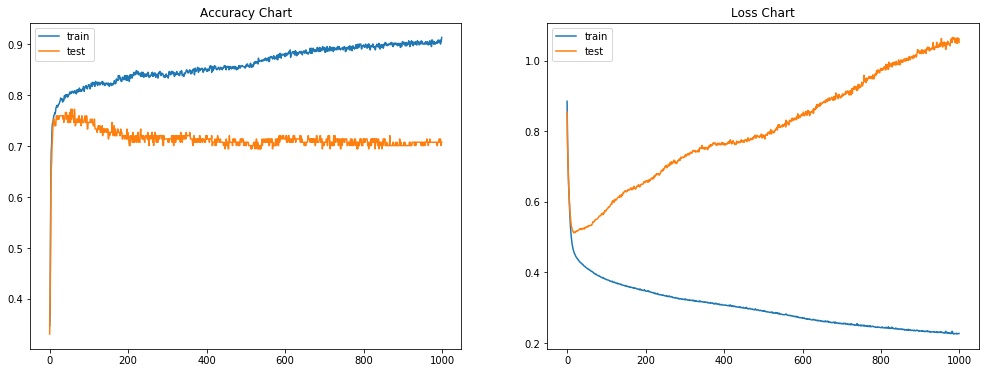

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax =plt.subplots(1,2,figsize=(17,6))
ax = ax.ravel()

ax[0].set_title('Accuracy Chart')
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='test')
ax[0].legend(loc='best')

ax[1].set_title('Loss Chart')
ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')
ax[1].legend(loc='best')

# plt.tight_layout()

In [20]:
td=[2.0,90.00,68.00,42.00,0.00,38.20,0.50,27.00]
td_array=np.array(td).reshape(1,8)
td_array

array([[ 2. , 90. , 68. , 42. ,  0. , 38.2,  0.5, 27. ]])

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(td_array)
test = scaler.fit_transform(td_array)
test

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
y_pred = model.predict(test)
y_pred

array([[0.8121863]], dtype=float32)